In [1]:
from astropy.time import Time, TimeDelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sunpy.io.special import read_genx
from sunxspex.sunxspex_fitting.fitter import SunXspex

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


In [2]:
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [3]:
# Return a string with a trailing 0 if <10
def ldz_int(num):
    if num<10:
        return f'0{int(num):d}'
    if num >=10:
        return f'{int(num):d}'
# Convert astropy time into break_time sswidl format used for the filenames
def break_time(time):
    t=time.ymdhms
    stime=f'{t.year:d}'+ldz_int(t.month)+ldz_int(t.day)+'_'+\
        ldz_int(t.hour)+ldz_int(t.minute)+ldz_int(t.second)
    return stime

In [4]:
# Use the genx file info for the times and the filename
res=read_genx('wee_fig9.genx')
nf=len(res["SAVEGEN0"])
ftims=[]
btims=[]
fname=[]

for f in range(nf):
    ftims.append(Time(res["SAVEGEN0"][f]["FPEAK_TR"],format='isot'))
    btims.append(Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot'))
    # spec and srm fits are bk_bf_tr[0]-4s    
    tt=Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot')[0]-TimeDelta(4,format='sec')
    fname.append(break_time(tt))

for f in range(nf):
    print(f'Flare: {f+1}')
    print('Peak Time Range: ',ftims[f].iso)
    print('Back Time Range: ',btims[f].iso)
    print('Filename : ',fname[f])
    


Flare: 1
Peak Time Range:  ['2003-02-27 06:22:26.000' '2003-02-27 06:22:42.000']
Back Time Range:  ['2003-02-27 06:21:06.000' '2003-02-27 06:21:22.000']
Filename :  20030227_062102
Flare: 2
Peak Time Range:  ['2003-03-17 18:41:38.000' '2003-03-17 18:41:54.000']
Back Time Range:  ['2003-03-17 18:39:34.000' '2003-03-17 18:39:50.000']
Filename :  20030317_183930
Flare: 3
Peak Time Range:  ['2003-04-29 17:42:54.000' '2003-04-29 17:43:10.000']
Back Time Range:  ['2003-04-29 17:41:10.000' '2003-04-29 17:41:26.000']
Filename :  20030429_174106
Flare: 4
Peak Time Range:  ['2003-07-25 08:26:34.000' '2003-07-25 08:26:50.000']
Back Time Range:  ['2003-07-25 08:22:54.000' '2003-07-25 08:23:10.000']
Filename :  20030725_082250
Flare: 5
Peak Time Range:  ['2004-01-17 07:28:38.000' '2004-01-17 07:28:54.000']
Back Time Range:  ['2004-01-17 07:26:14.000' '2004-01-17 07:26:30.000']
Filename :  20040117_072610
Flare: 6
Peak Time Range:  ['2004-10-24 00:31:38.000' '2004-10-24 00:31:54.000']
Back Time Rang

In [5]:
# Some setup for sunxspex
time_profile_size = (9,6)
spec_single_plot_size = (6,8)
spec_plot_size = (16,10)
spec_font_size = 18
default_font_size = 10
xlims, ylims = [3,30], [5e-2,3e4]
tol = 1e-5

fdir="/Users/iain/github/rhessi_spectra/figs/"
_dir = "/Users/iain/github/rhessi_spectra/mfstats9_fits/"

In [6]:
id=3
# use the summed over 6 detectors
spec = SunXspex(pha_file=_dir+fname[id]+"_spec_sum.fits", 
                srm_file=_dir+fname[id]+"_srm_sum.fits")

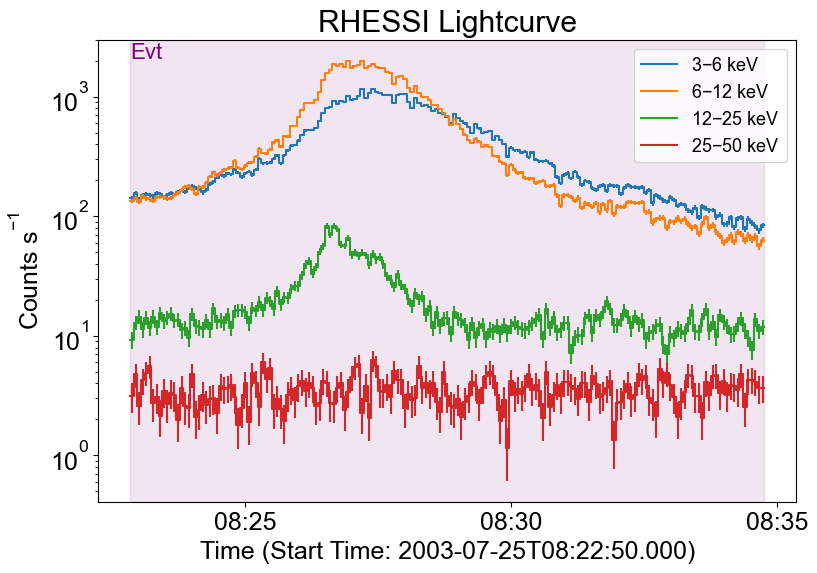

In [7]:
plt.rcParams['font.size'] = spec_font_size
plt.figure(figsize=time_profile_size)

# the line that actually plots
spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])

plt.show()
plt.rcParams['font.size'] = default_font_size

Time format must be ISOT with scale UTC.
Time format must be ISOT with scale UTC.
Time format must be ISOT with scale UTC.
Time format must be ISOT with scale UTC.


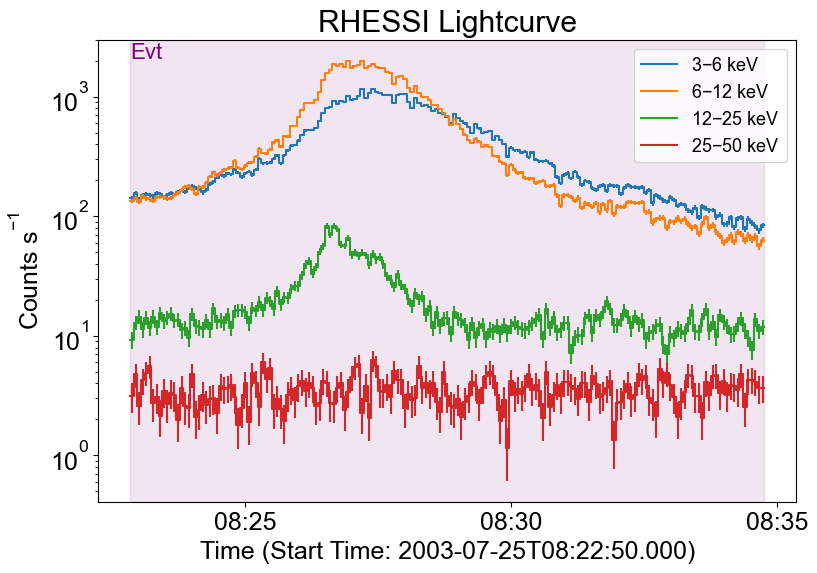

In [8]:
# background time. Both need to be set, if one is None (default) then no background will be calculated or will be removed
spec.data.loaded_spec_data['spectrum1'].start_background_time = btims[id].isot[0]
spec.data.loaded_spec_data['spectrum1'].end_background_time = btims[id].isot[1]

# event time
spec.data.loaded_spec_data['spectrum1'].start_event_time = ftims[id].isot[0]
spec.data.loaded_spec_data['spectrum1'].end_event_time = ftims[id].isot[1]

# plot again
plt.rcParams['font.size'] = spec_font_size
plt.figure(figsize=time_profile_size)
spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])
plt.show()
plt.rcParams['font.size'] = default_font_size

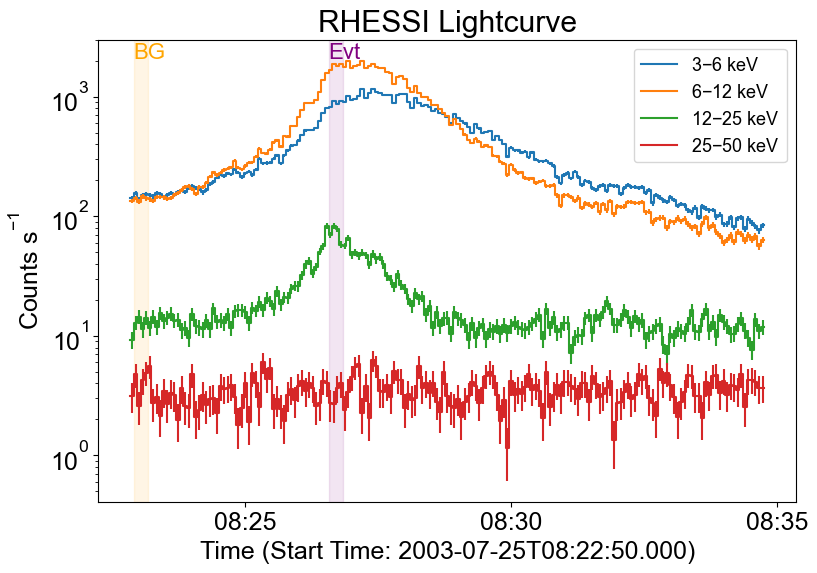

In [9]:
# background time. Both need to be set, if one is None (default) then no background will be calculated or will be removed
spec.data.loaded_spec_data['spectrum1'].start_background_time = btims[id].isot[0][:19]
spec.data.loaded_spec_data['spectrum1'].end_background_time = btims[id].isot[1][:19]

# event time
spec.data.loaded_spec_data['spectrum1'].start_event_time = ftims[id].isot[0][:19]
spec.data.loaded_spec_data['spectrum1'].end_event_time = ftims[id].isot[1][:19]

# plot again
plt.rcParams['font.size'] = spec_font_size
plt.figure(figsize=time_profile_size)
spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])
plt.show()
plt.rcParams['font.size'] = default_font_size

In [10]:
spec.model = "f_vth+thick_fn"
spec.loglikelihood = "cstat"
# spec.loglikelihood = "poisson" # This does odd things with this RHESSI data....
spec.show_params

Param,Status,Value,Bounds,Error
,,,"(min, max)","(-, +)"
str22,str11,float64,object,object
T1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
total_eflux1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
index1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
e_c1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
Fit Stat.,cstat ln(L),0.00e+00,--,--


In [11]:
# Just fit thermal part first and set the bounds
spec.energy_fitting_range = [4,8]
spec.params["T1_spectrum1"] = {"Value":10, "Bounds":(7, 20)}
spec.params["EM1_spectrum1"] = {"Value":1, "Bounds":(1e-2, 1e2)}
spec.params["total_eflux1_spectrum1"] = {"Status":"fix", "Value":0.9, "Bounds":(1e-2, 1e2)}
spec.params["index1_spectrum1"] = {"Status":"fix", "Value":6, "Bounds":(3, 12)}
spec.params["e_c1_spectrum1"] = {"Status":"fix", "Value":15, "Bounds":(7, 30)}
spec_fit = spec.fit()

# Then non-thermal fit higher energy
spec.energy_fitting_range = [8,15]
spec.params["T1_spectrum1"] = "fix"
spec.params["EM1_spectrum1"] = "fix"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()

# The do the full range
spec.energy_fitting_range = [4,15]
spec.params["T1_spectrum1"] = "free"
spec.params["EM1_spectrum1"] = "free"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()


In [12]:
print(spec.params)

                       Status      Value         Bounds   
T1_spectrum1             free  14.111289        (7, 20)  \
EM1_spectrum1            free   1.664747  (0.01, 100.0)   
total_eflux1_spectrum1   free   3.280125  (0.01, 100.0)   
index1_spectrum1         free   6.694113        (3, 12)   
e_c1_spectrum1           free   8.590443        (7, 30)   

                                                             Error  
T1_spectrum1            (0.15860566370767548, 0.15860566370767548)  
EM1_spectrum1           (0.14104485910481684, 0.14104485910481684)  
total_eflux1_spectrum1    (0.6679904258861231, 0.6679904258861231)  
index1_spectrum1        (0.12268448165198884, 0.12268448165198884)  
e_c1_spectrum1          (0.30998488243933864, 0.30998488243933864)  


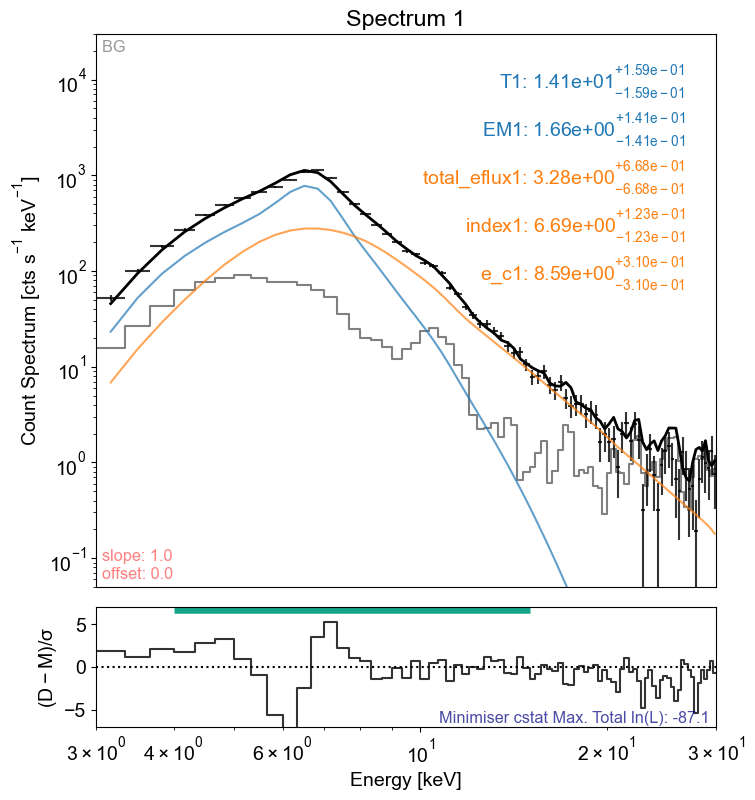

In [13]:
# Remember that sunxspex plots the background and data, 
# whereas ospex did background and data-background
# So total model black line is thermal+non-thermal+background

plt.rcParams['font.size'] = 14
plt.figure(figsize=[8,9])
axes, res_axes = spec.plot()
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.show()


In [14]:
mcmc_result = spec.run_mcmc(steps_per_walker=1000,walker_spread='mag_order')

100%|███████████████████████████████████████| 1000/1000 [01:40<00:00,  9.90it/s]


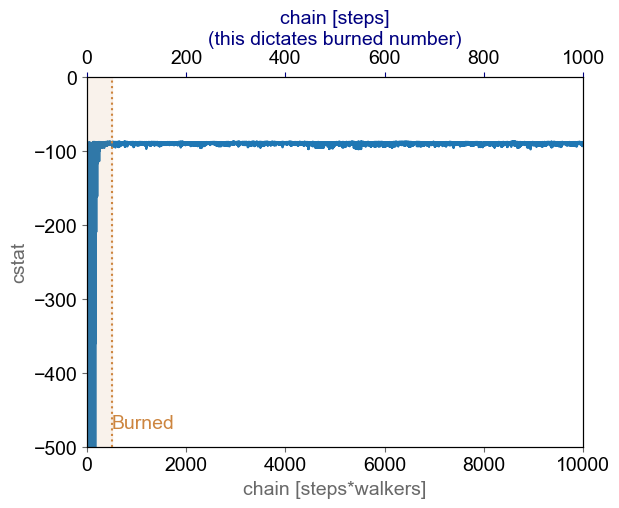

In [15]:
spec.burn_mcmc = 50
plt.figure()
spec.plot_log_prob_chain()
plt.ylim([-500,0])
plt.show()

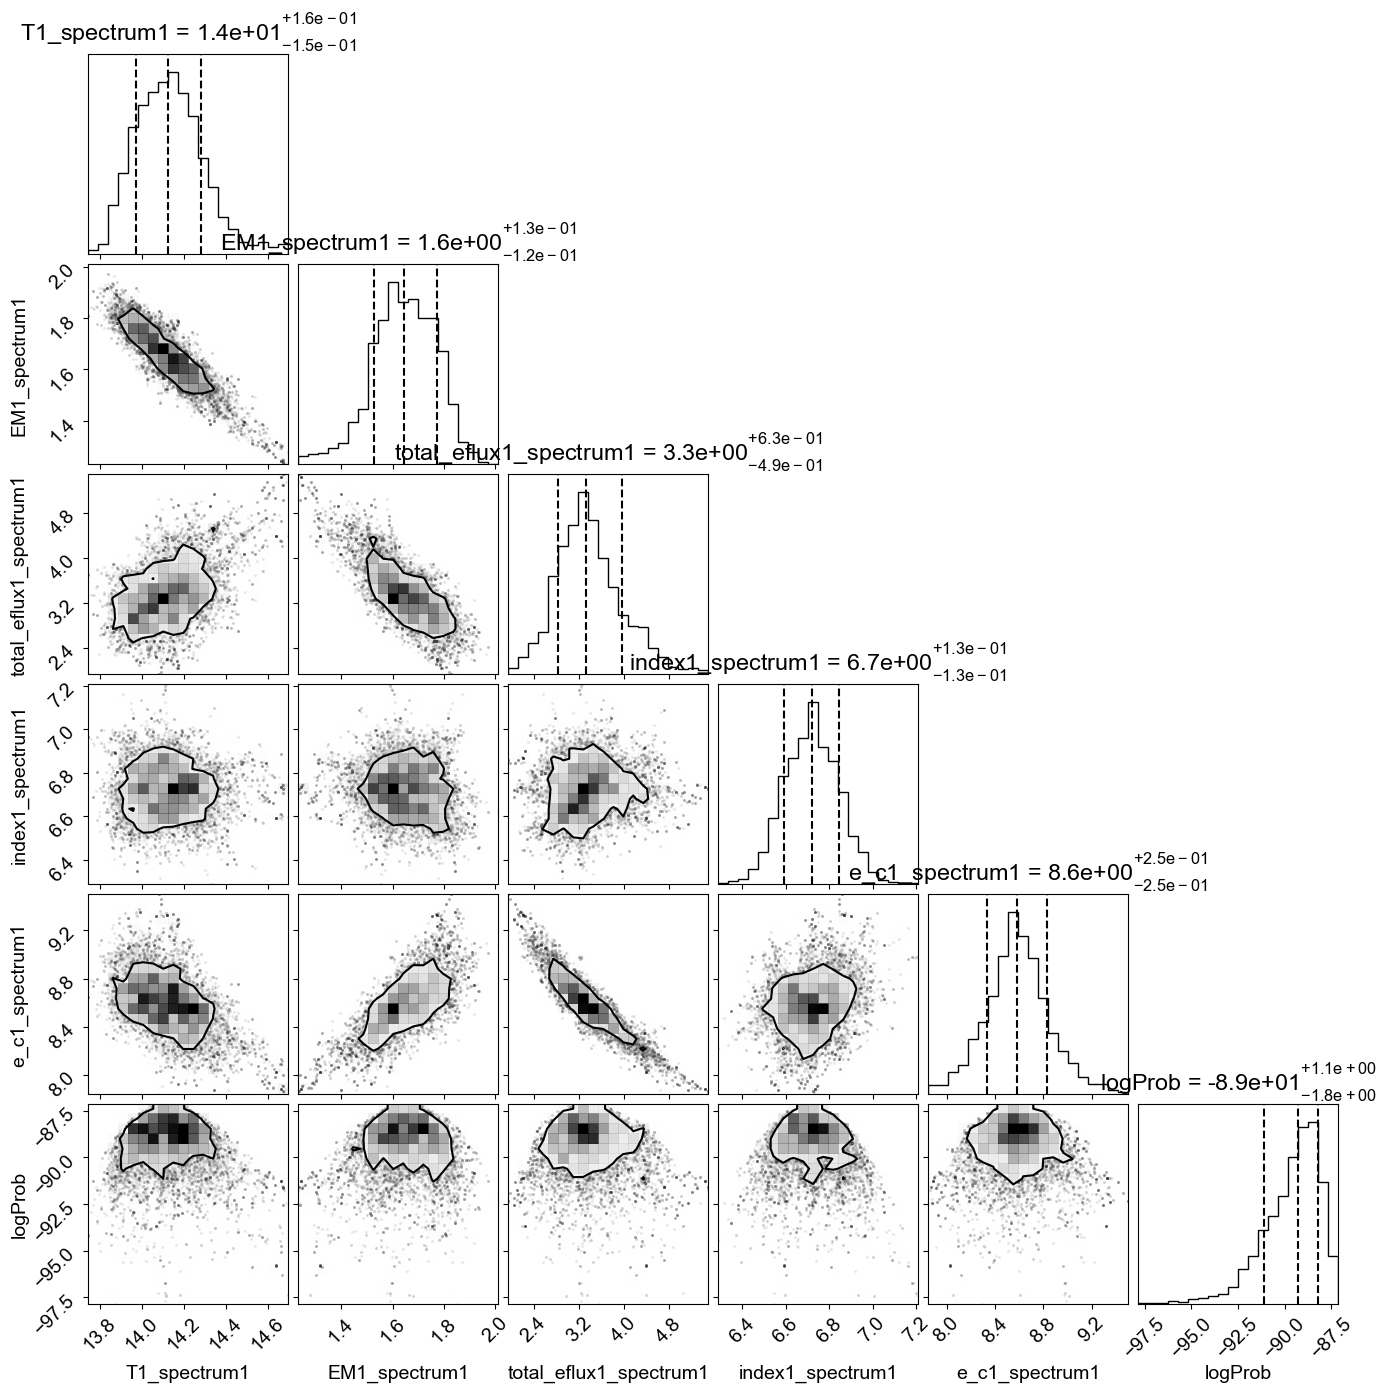

In [16]:
corner_plot = spec.corner_mcmc()

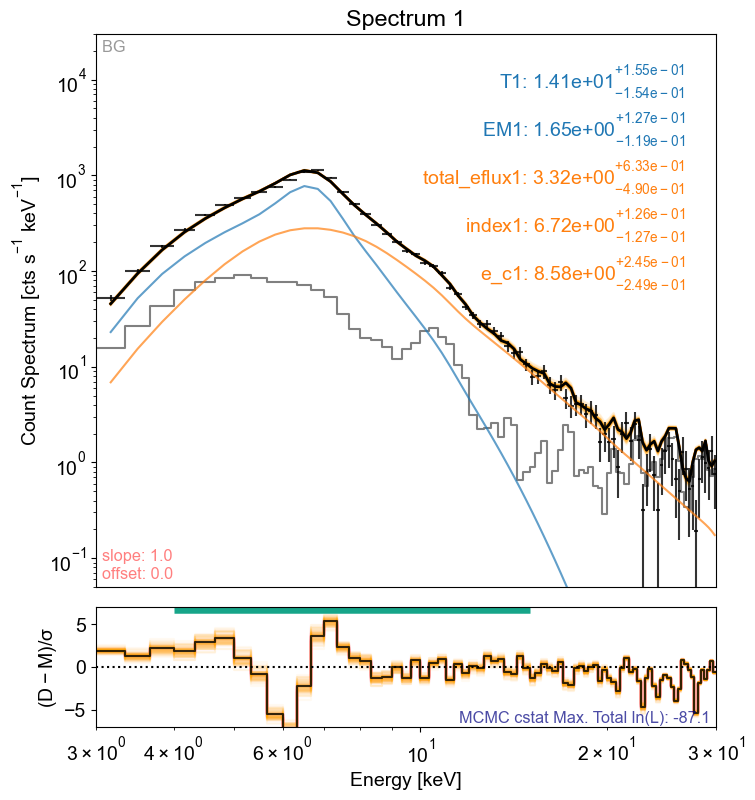

In [17]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=[8,9])
axes, res_axes = spec.plot()
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.show()
